图片读入程序中后，是以 nupmy 数组存在的。因此对 nupmy 数组的一切功能，对图片也适用。

对数组元素的访问，实际上就是对图片像素点的访问。

**彩色图片的访问方式：** img[ i , j , c ]
- i 表示图片的行数
- j 表示图片的列数
- c 表示图片的通道数 （ RGB 三通道分别对应 0，1，2）

坐标是从左上角开始

**灰度图片的访问方式：** gray[ i , j ]

**例1：** 输出小猫图片的 G 通道的第20行第30列的像素值

In [1]:
from skimage import io,data
img=data.chelsea()
pixel=img[20,30,1]
print(pixel)

129


**例2：** 显示红色单通道图片

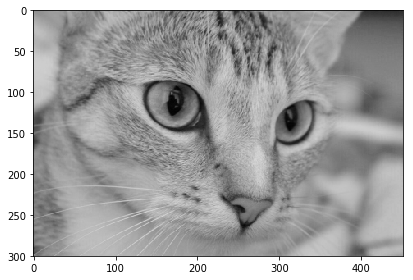

In [5]:
from skimage import io,data
img=data.chelsea()
R=img[:,:,0]     #（ RGB 三通道分别对应 0，1，2）
io.imshow(R)
io.show()

除了对像素进行读取，也可以修改像素值

**例3：** 对小猫图片随机添加椒盐噪声

from skimage import io,data
import numpy as np
img=data.chelsea()
#随机生成5000个噪声
rows,cols,dims=img.shape
for i in range(5000):
    x=np.random.randint(0,rows) #生成随机数
    y=np.random.randint(0,cols) #随机生成一个整数，范围在0到cols之间
    img[x,y,:]=255 #对像素值进行修改，将原来的三通道像素值，变为255
io.imshow(img)
io.show()

通过对数组的裁剪，就可以实现对图片的剪裁。

**例4：** 对小猫图片进行裁剪

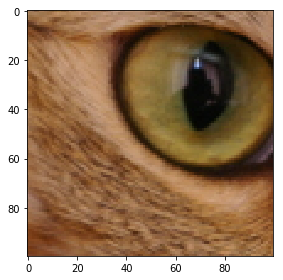

In [9]:
from skimage import io,data
img=data.chelsea()
roi=img[80:180,100:200,:]
io.imshow(roi)
io.show()

对多个像素点进行操作，使用数组切片方式访问。

切片方式返回的是以指定间隔下标访问该数组的像素值。

**下面是有关灰度图像的一些例子：**

In [ ]:
img[i,:]=img[j,:]  #将第 j 行的数值赋给第 i 行
img[:,i]=100       #将第 i 列的所有数值设为 100
img[:100,:50].sum  #计算前 100 行、前 50 列的所有数值的和
img[50:100,50:100] #50～100行，50~100列（不包括第100行和第100列）
img[i].mean()      #第 i 行所有数值的平均值
img[:,-1]          #最后一列
img[-2,:]          #(or im[-2])倒数第二行        

**对像素值进行访问和改变的例子**

**例5：** 将小猫图片进行二值化，像素值大于128的变为1，否则变为0

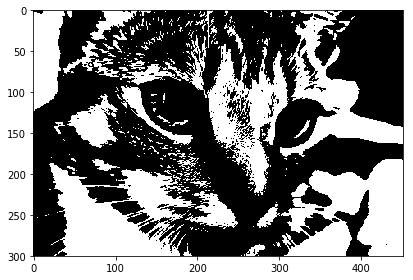

In [20]:
from skimage import io,data,color
img=data.chelsea()
img_gray=color.rgb2gray(img) 
#使用 color 模块的 rgb2gray() 函数，将彩色三通道图片转化为灰度图
rows,cols=img_gray.shape
for i in range(rows):
    for j in range(cols):
        if (img_gray[i,j]<=0.5):
            img_gray[i,j]=0
        else:
            img_gray[i,j]=1
io.imshow(img_gray)
io.show()

使用 color 模块的 rgb2gray() 函数，将彩色三通道图片转化为灰度图。

转化结果为 float64 类型的数组，范围为 [0,1] 之间。

**例6：** 将小猫图片的像素值进行判断和改变

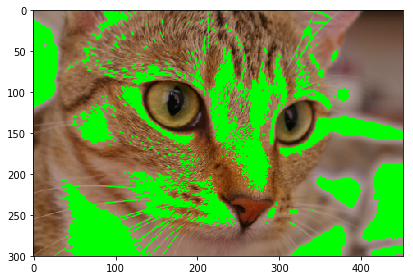

In [18]:
from skimage import io,data
img=data.chelsea()
reddish=img[:,:,0]>170 #对R通道的所有像素值进行判断
img[reddish]=[0,255,0]
io.imshow(img)
io.show()

先对R通道的所有像素值进行判断，如果大于170，则将这个地方的像素值变为[0,255,0]，即 G 通道的值为255，R 和 B 通道的值为 0 。